# App Behavior Analysis

## 1. Introduction

In today's markets, many companies produce mobile apps. But what kind of user will pay for the membership? 

Generally, companies will firstly give opportunity to users to try their free products/services. Then observe who is free user or potential membership/subscription buyer. 

The objective of market is finding out the potential customers and converting them from free user into paid user through analyzing their app behaviors.

### The Datasets:
Data can be downloaded from Kaggle. Here is the [link](https://www.kaggle.com/abhishek2602/appdata10).

Since dataset is private where the kaggle website lacks data discription, additional information can be found [here](https://indianaiproduction.com/directing-customers-to-subscription-through-financial-app-behavior-analysis-ml-project).

### Feature Explore:
#### appdata10.csv:
This csv records users' app behavior, with 12 features and 50000 instances.
   - user: user id
   - first_open: datetime that user first opened app
   - day_of_week: day when user open the app
   - hour: time of user open, which it is in 24-hour format
   - age: user age
   - screen_list: a list recording users' activities, splited by comma **`(probably the most important feature)`**
   - numscreens: total number of screen activities of each user
   - minigame: a binary feature that record user played minigame in app or not
   - used_premium_feature: a binary feature that record user used premium feature in app or not
   - enrolled: a binary feature that user paid for premium app version or not
   - enrolled_date: date of user enrolled in paid service
   - like: a binary feature that record user clicked like button or not
    

**Note**: Since this app is a free version for premium trial, users' behaviors are limited in **24 hours**.

#### top_screens.csv:
This csv contains type of users' screen activies. There is only 1 column with 58 unique values

### Task:
The task is identifying the interest of a new user to buy premium version. If a user will anyway pay it, so there is no need to send offer, Othewise, additional offers will be sent to user who is likely **NOT** to pay for the money-cost services.

## 2. Exploratory Data Analysis (EDA), Feature Engineering and Preprocessing

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

# Use this library to handle datetime-formatted feature
from dateutil import parser

## 2.1 EDA

In [2]:
# Data Import
df_data = pd.read_csv('data/appdata10.csv')
df_data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [3]:
df_top_screens = pd.read_csv('data/top_screens.csv')
df_top_screens.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [4]:
top_screens = df_top_screens['top_screens'].to_list()
print(top_screens)

['Loan2', 'location', 'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile', 'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation', 'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4', 'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker']


In [5]:
# There are 50000 instances
df_data.shape[0]

50000

In [6]:
df_data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [7]:
# Check missing value
df_data.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [8]:
# Drop user id where machine learning model do not care too much
df_data.drop(columns=['user'],inplace=True)

In [9]:
# Convert column hour into int
df_data['hour'] = df_data['hour'].str.slice(1,3).astype(int)

In [10]:
# Drop label and datetime-formatted columns, keeping numerical features only
df_data2 = df_data.copy().drop(columns=['screen_list', 'enrolled_date',
                                           'first_open', 'enrolled'])
df_data2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


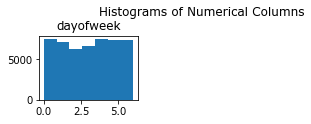

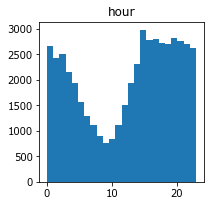

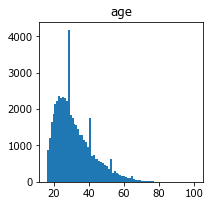

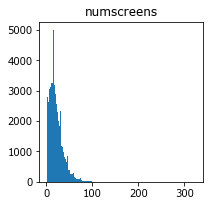

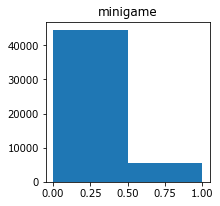

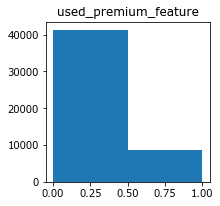

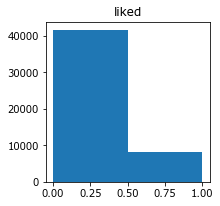

<Figure size 720x720 with 0 Axes>

In [11]:
# Plot histograms to overview feature distributions
plt.suptitle('Histograms of Numerical Columns', fontsize=12)

for i in range(1, df_data2.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(df_data2.columns.values[i-1])
    
    vals = np.size(df_data2.iloc[:,i-1].unique())
    
    plt.hist(df_data2.iloc[:,i-1], bins=vals)
    plt.figure(figsize=(10, 10))

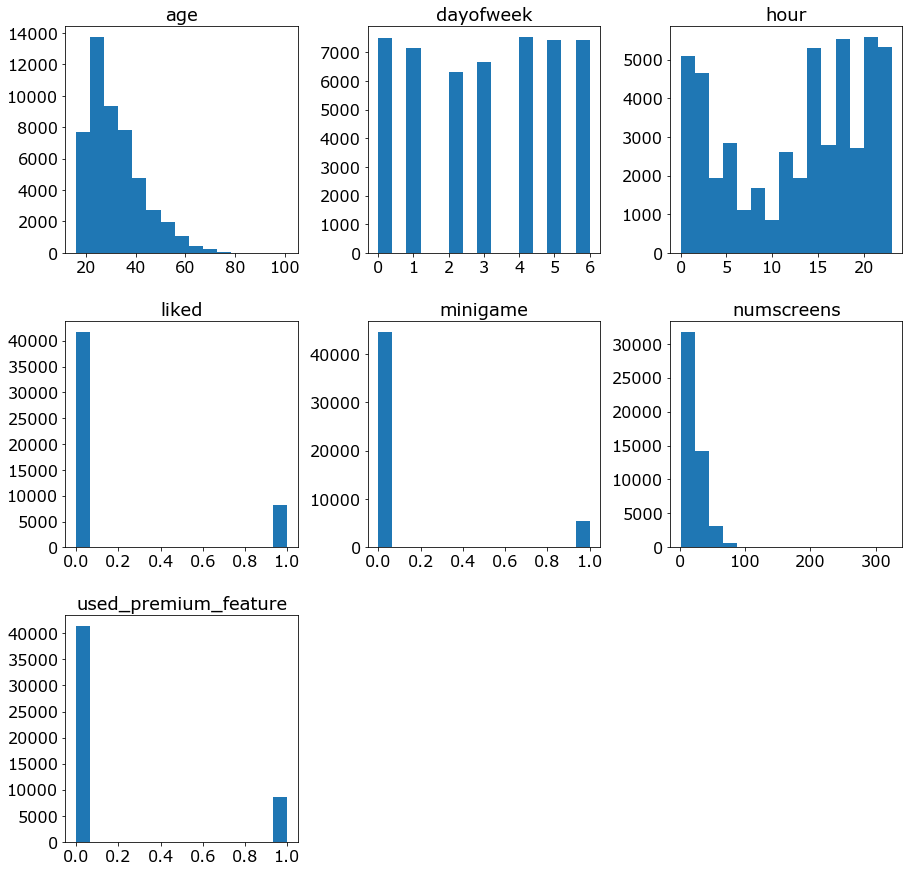

In [12]:
fig = df_data2.hist(grid=False, xlabelsize=16, ylabelsize=16, figsize=(15,15), bins=15)
[x.title.set_size(18) for x in fig.ravel()]
plt.show()

### Brief Anaysis:
   - age: most users are around 25-30 and there is a dramatic increase near 25
   - day of week: uniquely distributed
   - hour: most user used in afternoon and night
   - liked: over 80% users liked the app
   - minigame: over 85% users played the minigame
   - numscreen: over 80% users have below 20 screen activities
   - used premimum feature: over 80% users tried premium features

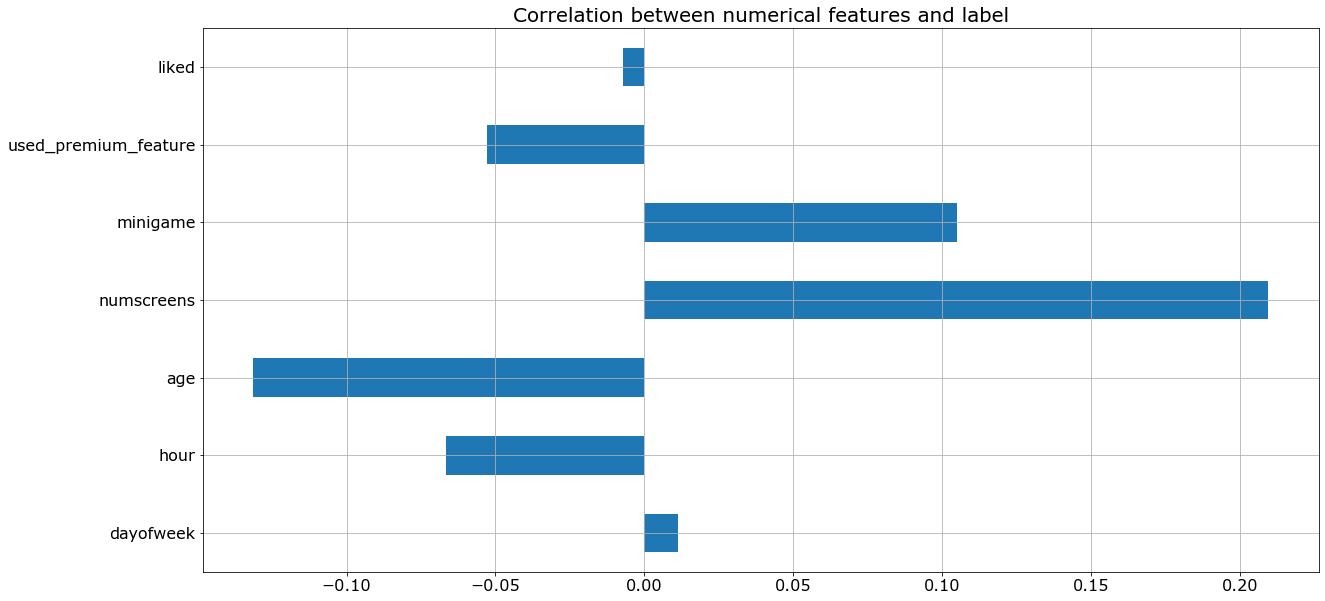

In [13]:
# Correlation between numerical features and label
ax = df_data2.corrwith(df_data.enrolled).plot.barh(figsize=(20,10), fontsize=16, grid=True)
ax.set_title('Correlation between numerical features and label',fontsize=20)
plt.show()

### Brief Anaysis:
   - use_premium_feature, minigame, numscreens, age, and hour are highly correleated with the label (enrollment)

Correlation matrix documentation is [here](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

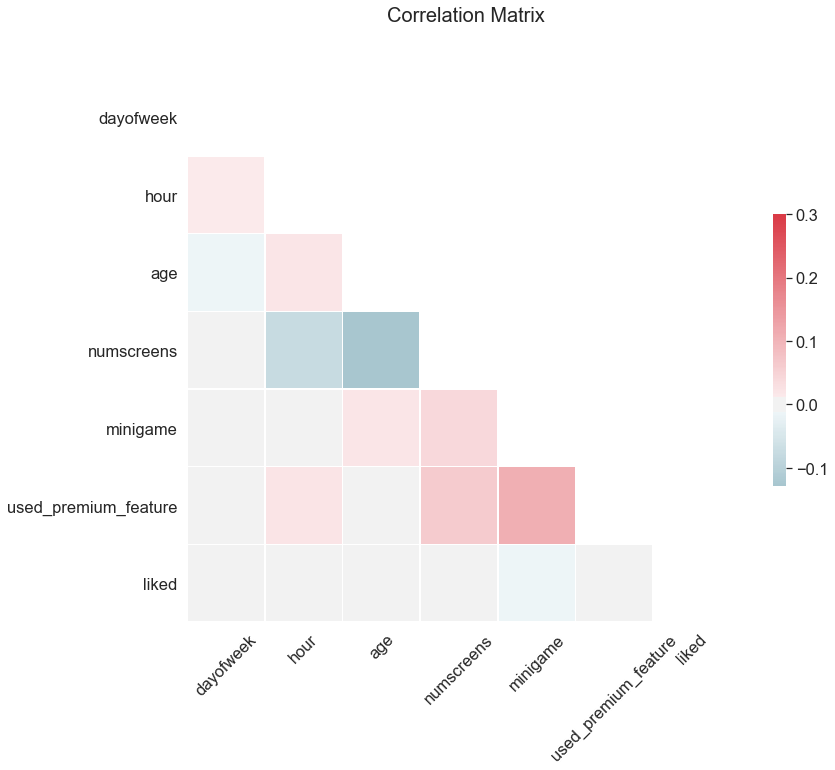

In [14]:
# Correlation matrix among numerical features
sns.set(style='white', font_scale=1.5)

# Compute the correlation matrix
corr = df_data2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
f.suptitle('Correlation Matrix', fontsize=20)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.5})
plt.xticks(rotation=45)
plt.show()

### Brief Anaysis:
   - Redish color represents positive correlation while bluish color represents negative correlation
   - The more red or blue for a grid, the higher correlation relationship between 2 features
   - The absolute values of correlation are all below 0.3, considering they are all independent with each other.

## 2.2 Feature Engineering and Preprocessing

In [15]:
df_data.dtypes

first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [16]:
# Convert string into datatime for first_open feature
df_data['first_open'] = [parser.parse(row_data) for row_data in df_data['first_open']]

In [17]:
df_data['enrolled_date'] = [parser.parse(str(row_data)) if isinstance(row_data, str) else row_data for row_data in df_data['enrolled_date']]

In [18]:
# Make time difference in hour-formatted
df_data['difference'] = (df_data['enrolled_date'] - df_data['first_open']).astype('timedelta64[h]')

In [19]:
df_data.head()

,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


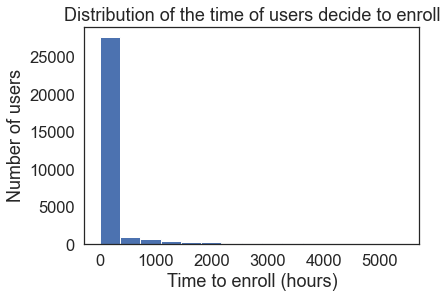

In [20]:
plt.hist(df_data['difference'].dropna(), bins=15)
plt.xlabel('Time to enroll (hours)')
plt.ylabel('Number of users')
plt.title('Distribution of the time of users decide to enroll')
plt.show()

Most users who decide to enroll would enroll within 250 hours

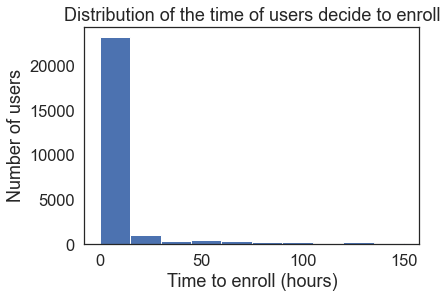

In [21]:
plt.hist(df_data['difference'].dropna(), bins=10, range=[0, 150])
plt.xlabel('Time to enroll (hours)')
plt.ylabel('Number of users')
plt.title('Distribution of the time of users decide to enroll')
plt.show()

Most users who decide to enroll would enroll within 10-15 hours

In [22]:
# Consider users who take more than 48 hours to enroll outliers
df_data.loc[df_data['difference'] > 48, 'enrolled'] = 0

In [23]:
# Drop enrolled_date, first_open, difference
df_data.drop(columns=['enrolled_date', 'first_open', 'difference'], inplace=True)

In [24]:
# Comma can be used as a counter to count the number of screen activities
df_data['screen_list'] = df_data['screen_list'].astype(str) + ','

In [25]:
# Check screen activities in top screens or not
# Make top screen activity list and other screen activity list as new features
for screen in top_screens:
    df_data[screen] = df_data['screen_list'].str.contains(screen).astype(int)
    df_data['screen_list'] = df_data['screen_list'].str.replace(screen+',', ',')
df_data['other_screens'] = df_data['screen_list'].str.count(',')
df_data.drop(columns=['screen_list'], inplace=True)

### [Funnel Analysis](https://www.kaggle.com/babakgohardani/predicting-user-subscription-logistic-regression)
Creat funnels to categorize screen activities

In [26]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
df_data["saving_count"] = df_data[savings_screens].sum(axis=1)
df_data = df_data.drop(columns=savings_screens)

In [27]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
df_data["cm_count"] = df_data[cm_screens].sum(axis=1)
df_data = df_data.drop(columns=cm_screens)

In [28]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
df_data["cc_count"] = df_data[cc_screens].sum(axis=1)
df_data = df_data.drop(columns=cc_screens)

In [29]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
df_data["loans_count"] = df_data[loan_screens].sum(axis=1)
df_data = df_data.drop(columns=loan_screens)

In [30]:
df_data.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other_screens,saving_count,cm_count,cc_count,loans_count
0,3,2,23,15,0,0,0,0,0,0,...,0,0,0,0,0,13,0,0,0,1
1,6,1,24,13,0,0,0,0,1,1,...,0,0,0,0,0,11,0,0,0,1
2,1,19,23,3,0,1,0,1,0,0,...,0,0,0,0,0,3,0,0,0,1
3,4,16,28,40,0,0,1,0,1,0,...,0,0,0,0,0,17,0,3,0,1
4,1,18,31,32,0,0,1,1,0,1,...,0,0,0,0,0,19,0,2,0,1


In [31]:
df_data.columns

Index(['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other_screens',
       'saving_count', 'cm_count', 'cc_count', 'loans_count'],
      dtype='object')

Do Standardization to avoid the particular numerical feature having great influence on the model

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [33]:
# Standardize X
X_sc = pd.DataFrame(sc.fit_transform(df_data.drop(columns='enrolled')))

In [34]:
X_sc.columns = df_data.drop(columns='enrolled').columns

In [35]:
X_sc.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other_screens,saving_count,cm_count,cc_count,loans_count
0,-0.014695,-1.419363,-0.807572,-0.387567,-0.347635,-0.455805,-0.444528,-1.036174,-0.644786,0.951953,...,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,0.002379,-0.259709,-0.762022,-0.288619,0.312345
1,1.461700,-1.553808,-0.715007,-0.514723,-0.347635,-0.455805,-0.444528,0.965089,1.550903,0.951953,...,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,-0.279448,-0.259709,-0.762022,-0.288619,0.312345
2,-0.998958,0.866198,-0.807572,-1.150505,-0.347635,2.193918,2.249579,-1.036174,-0.644786,-1.050472,...,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,-1.406756,-0.259709,-0.762022,-0.288619,0.312345
3,0.477437,0.462864,-0.344746,1.201889,-0.347635,-0.455805,-0.444528,0.965089,-0.644786,0.951953,...,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,0.566032,-0.259709,1.702048,-0.288619,0.312345
4,-0.998958,0.731753,-0.067050,0.693263,-0.347635,-0.455805,2.249579,-1.036174,1.550903,0.951953,...,-0.120105,-0.116277,-0.116542,-0.090927,-0.087395,0.847859,-0.259709,0.880691,-0.288619,0.312345


## 3. Model Building
Try logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [37]:
y = df_data['enrolled']
X = df_data.drop(columns='enrolled')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc, y, test_size=0.2, random_state=42)

As working on the screen acctivities, user's current activity may affect the following activity.

Therefore, their could be potential correlation in this feature.

Since there are a number of features, applying L1 regularization (penalize features correlating to the label) to avoid effect the correlation which gives smaller weight to it.

In [40]:
lr = LogisticRegression(solver='liblinear', penalty='l1')

lr_sc = LogisticRegression(solver='liblinear', penalty='l1')

In [41]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7724

In [42]:
lr_sc.fit(X_train_sc, y_train_sc)
lr_sc.score(X_test_sc, y_test_sc)

0.7727

In [43]:
y_pred = lr.predict(X_test)

In [44]:
y_pred_sc = lr_sc.predict(X_test_sc)

## 4. Model Evaluation

In [45]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

In [46]:
cm = confusion_matrix(y_test_sc, y_pred_sc)
accuracy_score(y_test_sc, y_pred_sc), precision_score(y_test_sc, y_pred_sc), recall_score(y_test_sc, y_pred_sc), f1_score(y_test_sc, y_pred_sc)

(0.7727, 0.7622, 0.7785495403472932, 0.7702880242546742)

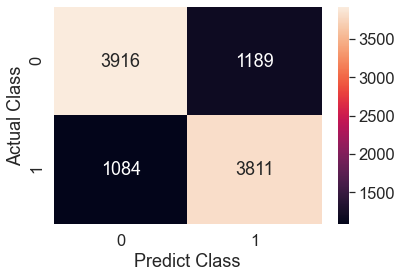

In [47]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predict Class')
plt.ylabel('Actual Class')
sns.set(font_scale=1.2)
plt.show()

Recall score is high, so type 2 error is not severe

In [48]:
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(3916, 1189, 1084, 3811)

Use k-fold validation to check overfitting, mean accuracy is high and variance is small

Therefore the model is consistently accurate

In [49]:
cvs(estimator=lr_sc, X=X_train_sc, y=y_train_sc, cv=5).mean(), cvs(estimator=lr_sc, X=X_train_sc, y=y_train_sc, cv=5).std()

(0.766475, 0.00677375449806089)

## 5. Model Improvement

Implement grid search to find the best hyperparameter set via tuning C and regularization type

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
# Create searching grid
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(C=C, penalty=penalty)

In [52]:
grid = GridSearchCV(estimator=lr_sc, param_grid=param_grid, cv=10, n_jobs=-1)
t0 = time.time()
grid_search = grid.fit(X_train_sc, y_train_sc)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 59.26 seconds


In [53]:
grid.best_score_

0.7669249999999999

In [54]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [55]:
grid.best_estimator_

LogisticRegression(C=0.1, solver='liblinear')

In [56]:
# Final accuracy
grid.score(X_test_sc, y_test_sc)

0.7726

## 6. Model Summary

   - Final accuracy is decent, 0.7726
   - Effect of type 2 error is not significant
   - Grid search shows that l2 penalty is better, which conflicts the previous assumption